In [1]:
import pandas as pd
import numpy as np


In [2]:
df_normal = pd.read_csv("archive/ptbdb_normal.csv", header = None)
df_abnormal = pd.read_csv("archive/ptbdb_abnormal.csv", header = None)

In [3]:
print(f"Normal dataset size is {df_normal.shape}")
df_normal.head()

Normal dataset size is (4046, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f'Abnormal dataset size is {df_abnormal.shape}')
df_abnormal.head()

Abnormal dataset size is (10506, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Checking if last column is for classification:
print(f"Every element in the last column  of df_normal is equal to 0: {df_normal[187].sum() == 0}")
print(f"Every element in the last column  of df_abnormal is equal to 1: {df_abnormal[187].sum() == df_abnormal.shape[0]}")

Every element in the last column  of df_normal is equal to 0: True
Every element in the last column  of df_abnormal is equal to 1: True


In [6]:
df = pd.concat([df_normal, df_abnormal])
print(df.shape)

(14552, 188)


In [7]:
# Separating features and target 

X = np.array(df[df.columns[:-1]])
print(f'The feature space is of shape: {X.shape}')
Y= np.array(df[187])
print(f'The target is of shape: {Y.shape}')

The feature space is of shape: (14552, 187)
The target is of shape: (14552,)


In [40]:
z = [12,13,15]
print(len(z))
print(z[0])
print(z[-1])
print(z[-1]- z[0] + 1)

3
12
15
4


In [8]:
def findFirstIndexOfPadding(a):
    """Input: a - an np array of shape (n,)
       Output: theIndex - the index where the zero padding of 
               the np array a starts. If the array a does not end in 0 
               then return value is None.
       """
    zeroLoc = np.where(a ==0)[0]
    if (zeroLoc[-1] +1) != len(a):
        theIndex = None
    else:
        theIndex = -2
        while theIndex == -2:
            if (zeroLoc[-1] - zeroLoc[0] + 1) == len(zeroLoc):
                theIndex = zeroLoc[0]
            elif len(zeroLoc) == 2:
                theIndex = zeroLoc[-1]
            else:
                zeroLoc = zeroLoc[1:]       
    return theIndex

In [9]:
#Finding smallest first index of padding:
firstIndicesOfPadding = [findFirstIndexOfPadding(row) for row in X if findFirstIndexOfPadding(row) is not None ]


In [10]:
firstIndicesOfPadding.sort()
# firstIndicesOfPadding

In [11]:
print(f'There were {len(firstIndicesOfPadding)} rows in X that were padded.')
print(f'There are {X.shape[0]} rows in total in X.')

There were 14552 rows in X that were padded.
There are 14552 rows in total in X.


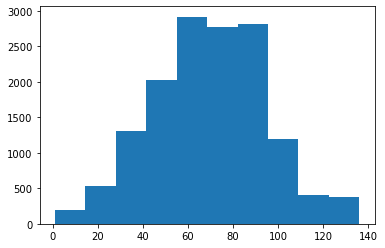

In [12]:
paddingLengths = [X.shape[1] - n for n in firstIndicesOfPadding]
paddingLengths[-10:]
import matplotlib.pyplot as plt
plt.hist(paddingLengths)
plt.show()

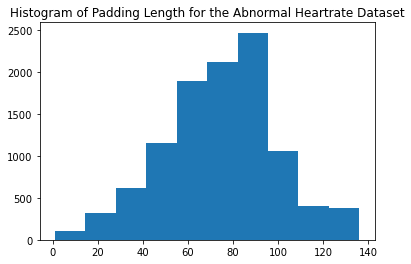

In [13]:
X_abnormal = np.array(df_abnormal[df.columns[:-1]])
X_abnormal.shape
firstZeroIndex_abnormal = [findFirstIndexOfPadding(row) for row in X_abnormal if findFirstIndexOfPadding(row) is not None ]
firstZeroIndex_abnormal.sort()
paddingLengths_abnormal = [X_abnormal.shape[1] - n for n in firstZeroIndex_abnormal]
import matplotlib.pyplot as plt
plt.hist(paddingLengths_abnormal)
plt.title("Histogram of Padding Length for the Abnormal Heartrate Dataset")
plt.show()

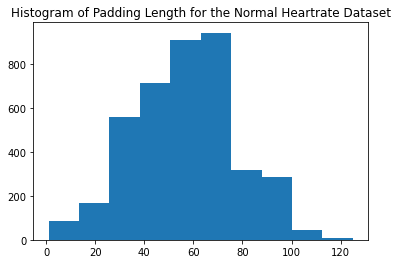

In [14]:
X_normal = np.array(df_normal[df.columns[:-1]])
X_normal.shape
firstZeroIndex_normal = [findFirstIndexOfPadding(row) for row in X_normal if findFirstIndexOfPadding(row) is not None ]
firstZeroIndex_normal.sort()
paddingLengths_normal = [X_normal.shape[1] - n for n in firstZeroIndex_normal]
import matplotlib.pyplot as plt
plt.hist(paddingLengths_normal)
plt.title("Histogram of Padding Length for the Normal Heartrate Dataset")
plt.show()

In [16]:
#finding indices of rows with padding shorter than paddingLength
paddingLength = 86
cutOffIndex  = 187 - paddingLength
cutOffIndex

rowIndices= [i for i in range(X.shape[0]) \
             if (findFirstIndexOfPadding(X[i,:]) is not None ) & (findFirstIndexOfPadding(X[i,:]) > cutOffIndex)]
print(f"The number of rows with padding length shorter than {paddingLength} is {len(rowIndices)}.")
print(f"The fraction of abnormal rows out of all the rows with padding length shorter than {paddingLength} is {np.sum(Y[rowIndices])/Y.shape[0]}")
print(f"The fraction of normal rows out of all the rows with padding length shorter than {paddingLength} is {(Y.shape[0]- np.sum(Y[rowIndices]))/Y.shape[0]}")

The number of rows with padding length shorter than 86 is 10822.
The fraction of abnormal rows out of all the rows with padding length shorter than 86 is 0.4894172622319956
The fraction of normal rows out of all the rows with padding length shorter than 86 is 0.5105827377680044


In [17]:
X_86 = X[rowIndices,:]
Y_86 = Y[rowIndices]
print(X_86.shape)
print(Y_86.shape)

(10822, 187)
(10822,)


## Using reduced length rows to limit the padding 

In [18]:
from sklearn.model_selection import train_test_split
# Set the random state to 42
Xtrain, Xtest, ytrain, ytest =train_test_split(X_86, Y_86, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# param_grid = {'svc__C': [1, 5, 10, 50],
#               'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
model = SVC(kernel='rbf', class_weight = "balanced")
model.fit(Xtrain, ytrain)

SVC(class_weight='balanced')

In [20]:
yfit = model.predict(Xtest)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       751
         1.0       0.96      0.83      0.89      1414

    accuracy                           0.86      2165
   macro avg       0.85      0.88      0.85      2165
weighted avg       0.88      0.86      0.86      2165



In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

In [23]:
cm= confusion_matrix(ytest,yfit )
acc  = accuracy(ytest,yfit)
rec  = recall(ytest,yfit )
prec = precision(ytest,yfit )
f1   = f1_score(ytest,yfit )
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.8614318706697459, Precision = 0.955810147299509, Recall = 0.826025459688826, F1-score = 0.8861911987860395
Confusion Matrix is:
[[ 697   54]
 [ 246 1168]]


##  Using entire length of rows


In [24]:
def svm_model(X,Y):
    Xtrain, Xtest, ytrain, ytest =train_test_split(X, Y, test_size=0.2, random_state=42)
    model = SVC(kernel='rbf', class_weight = "balanced")
    model.fit(Xtrain, ytrain)
    yfit = model.predict(Xtest)
    #Printing results
    print(classification_report(ytest, yfit))
    cm= confusion_matrix(ytest,yfit )
    acc  = accuracy(ytest,yfit)
    rec  = recall(ytest,yfit )
    prec = precision(ytest,yfit )
    f1   = f1_score(ytest,yfit )
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
    print('Confusion Matrix is:')
    print(cm)
    return model

In [26]:
entire_model = svm_model(X,Y)

              precision    recall  f1-score   support

         0.0       0.72      0.94      0.81       834
         1.0       0.97      0.85      0.91      2077

    accuracy                           0.88      2911
   macro avg       0.84      0.90      0.86      2911
weighted avg       0.90      0.88      0.88      2911

Accuracy = 0.8766746822397802, Precision = 0.971978021978022, Recall = 0.8517091959557054, F1-score = 0.9078778547600718
Confusion Matrix is:
[[ 783   51]
 [ 308 1769]]


## Conclusion Concerning Limiting the Padding
Reducing the max padding length by removing rows with padding longer than the max = 86, did not improve the results 

## Varying the gamma value to improve the model

Keeping the dataset as is, we will run a grid search to find the optimal parameter. We will use the entire data set X for training and testing.    

In [50]:
Xtrain, Xtest, ytrain, ytest =train_test_split(X, Y, test_size=0.2, random_state=42)


In [62]:
def svm_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid, kernel = 'rbf'):
    """
    Input:
    Xtrain, Xtest, ytrain, ytest  -- training set and test set 
    param_grid -- parameters for the svm model
    kernel -- the kernel to be used for the svm model, default = 'rbf'
    Output:
    Model -- the model created using the best parameters tested by the grid search
    """
    svc = SVC(class_weight = "balanced")
    grid =  GridSearchCV(svc, param_grid)
    print(svc.get_params().keys())
    clf = grid.fit(Xtrain, ytrain)
    print(clf.best_estimator_)
    print(clf.best_params_)
    print(clf.get_params())
    model = clf.best_estimator_
    yfit = model.predict(Xtest)
    print(classification_report(ytest, yfit))
    cm= confusion_matrix(ytest,yfit )
    acc  = accuracy(ytest,yfit)
    rec  = recall(ytest,yfit )
    prec = precision(ytest,yfit )
    f1   = f1_score(ytest,yfit )
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
    print('Confusion Matrix is:')
    print(cm)
    return model

In [49]:

param_grid = {'gamma': [0.0001, 0.0005, 0.001, 0.005]}
svm_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid) #without using class_weight = "balanced"

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
SVC(gamma=0.005)
{'gamma': 0.005}
{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'iid': 'deprecated', 'n_jobs': None, 'param_grid': {'gamma': [0.0001, 0.0005, 0.001, 0.005]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}
              precision    recall  f1-score   support

         0.0     

SVC(gamma=0.005)

In [53]:
svm_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid, kernel = 'linear')

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
SVC(gamma=0.0001, kernel='linear')
{'gamma': 0.0001}
{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(kernel='linear'), 'iid': 'deprecated', 'n_jobs': None, 'param_grid': {'gamma': [0.0001, 0.0005, 0.001, 0.005]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}
              precision    recall  

SVC(gamma=0.0001, kernel='linear')

In [59]:
param_grid = {'kernel' : ['linear', 'rbf'], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [60]:
svm_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid) # using class_weight = "balanced"

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
SVC(class_weight='balanced', gamma=0.0001, kernel='linear')
{'gamma': 0.0001, 'kernel': 'linear'}
{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': 'balanced', 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(class_weight='balanced'), 'iid': 'deprecated', 'n_jobs': None, 'param_grid': {'kernel': ['linear', 'rbf'], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_tr

SVC(class_weight='balanced', gamma=0.0001, kernel='linear')

In [63]:
param_grid = {'kernel' :  ['rbf', 'linear', 'poly', 'sigmoid'], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}
svm_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid) # using class_weight = "balanced"

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
SVC(class_weight='balanced', gamma=0.0001, kernel='linear')
{'gamma': 0.0001, 'kernel': 'linear'}
{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': 'balanced', 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(class_weight='balanced'), 'iid': 'deprecated', 'n_jobs': None, 'param_grid': {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}, 'pre_dispatch': '2*n_jobs', 'refit

SVC(class_weight='balanced', gamma=0.0001, kernel='linear')

## Standardizing the heartrates before building the model


In [61]:
g = SVC(kernel='linear')
print(g.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())

In [69]:
def svmStandardized_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid):
    """
    Input:
    Xtrain, Xtest, ytrain, ytest  -- training set and test set 
    param_grid -- parameters for the svm model
    kernel -- the kernel to be used for the svm model, default = 'rbf'
    Output:
    Model -- the model created using the best parameters tested by the grid search
    """
 
    pipe = make_pipeline(StandardScaler(), SVC(class_weight = 'balanced'))
    grid =  GridSearchCV(pipe, param_grid)
    print(pipe.get_params().keys())
    clf = grid.fit(Xtrain, ytrain)
    print(clf.best_estimator_)
    print(clf.best_params_)
    print(clf.get_params())
    model = clf.best_estimator_
    yfit = model.predict(Xtest)
    print(classification_report(ytest, yfit))
    cm= confusion_matrix(ytest,yfit )
    acc  = accuracy(ytest,yfit)
    rec  = recall(ytest,yfit )
    prec = precision(ytest,yfit )
    f1   = f1_score(ytest,yfit )
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
    print('Confusion Matrix is:')
    print(cm)
    return model

In [72]:
param_grid = {'svc__kernel' : ['linear', 'rbf'], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [73]:
svmStandardized_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid)

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma=0.005))])
{'svc__gamma': 0.005, 'svc__kernel': 'rbf'}
{'cv': None, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('standardscaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))], 'estimator__verbose': False, 'estimator__standardscaler': StandardScaler(), 'estimator__svc': SVC(class_weight='balanced'), 'estimator__standardscaler__copy': True, 'estimator__standardscaler__with_mean': True, 'estimator__standardscaler__with_std': True, 'estima

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma=0.005))])

## Rerunning the best model thus far and plotting some results

In [74]:
gamma = 0.005
kernel = 'rbf'
pipe = make_pipeline(StandardScaler(), SVC(kernel = kernel, gamma = gamma, class_weight = 'balanced'))
pipe.fit(Xtrain, ytrain) 
pipe.score(Xtest, ytest)


0.8890415664720027

In [75]:
yfit = pipe.predict(Xtest)

In [76]:
    print(classification_report(ytest, yfit))
    cm= confusion_matrix(ytest,yfit )
    acc  = accuracy(ytest,yfit)
    rec  = recall(ytest,yfit )
    prec = precision(ytest,yfit )
    f1   = f1_score(ytest,yfit )
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
    print('Confusion Matrix is:')
    print(cm)

              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83       834
         1.0       0.97      0.87      0.92      2077

    accuracy                           0.89      2911
   macro avg       0.86      0.90      0.87      2911
weighted avg       0.91      0.89      0.89      2911

Accuracy = 0.8890415664720027, Precision = 0.9730312837108953, Recall = 0.8685604236880116, F1-score = 0.917832612566777
Confusion Matrix is:
[[ 784   50]
 [ 273 1804]]


#### Plotting some heartbeats


In [118]:
allWrongIndices = np.where(yfit != ytest)[0]
allRightIndices = np.where(yfit == ytest)[0]
print(allWrongIndices.shape)
print(allRightIndices.shape)

(323,)
(2588,)


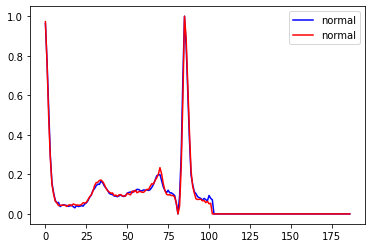

In [107]:
plt.plot(Xtest[15,:], color = 'blue', label = 'normal' if ytest[15]  == 0 else 'abnormal')
plt.plot(Xtest[197,:], color = 'red', label = 'normal' if ytest[197]  == 0 else 'abnormal')
plt.legend()
plt.show()

In [122]:
falsePositiveIndices = allWrongIndices[np.where(ytest[allWrongIndices] == 1)]
falseNegativeIndices = allWrongIndices[np.where(ytest[allWrongIndices] == 0)]
truePositiveIndices = allRightIndices[np.where(ytest[allRightIndices] == 0)]
trueNegativeIndices = allRightIndices[np.where(ytest[allRightIndices]== 1)]
print(f"The number of false positives is: {falsePositiveIndices.shape[0]}")
print(f"The number of false negatives is: {falseNegativeIndices.shape[0]}")
print(f"The number of true positives is: {truePositiveIndices.shape[0]}")
print(f"The number of true negatives is: {trueNegativeIndices.shape[0]}")
print(f"To check, compare values to the confusion matrix for the model: \n {cm}")

The number of false positives is: 273
The number of false negatives is: 50
The number of true positives is: 784
The number of true negatives is: 1804
To check, compare values to the confusion matrix for the model: 
 [[ 784   50]
 [ 273 1804]]


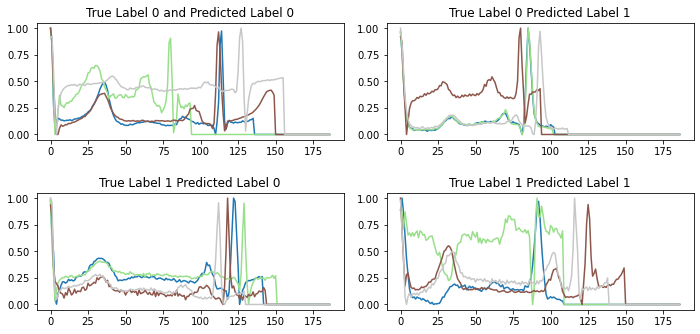

In [201]:
import pylab
numCurves = 4 #number of curves per plot
cm = pylab.get_cmap('tab20')
cgen = [cm(1.*i/numCurves) for i in range(numCurves)] #generating a unique color for each curve in the plot
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 5)
indList = [truePositiveIndices, falseNegativeIndices, falsePositiveIndices, trueNegativeIndices]
titleList = ['True Label 0 and Predicted Label 0', "True Label 0 Predicted Label 1", "True Label 1 Predicted Label 0","True Label 1 Predicted Label 1"]
for i, axi in enumerate(ax.flat):
    j = indList[i][:numCurves]
#     print(j)
    for k in range(numCurves):
        axi.plot(Xtest[j[k],:], color = cgen[k])
    axi.set_title( titleList[i])
fig.tight_layout(pad=2.0)



### Examining the False Negatives

In [189]:
# Breaking up X into subsets of fp,fn, tp, and tn.
Xfn = Xtest[falseNegativeIndices,:] #the data set classified as label 1, though it was label 0
Xtp = Xtest[truePositiveIndices,:] #the data set classified as label 1 with actual label 1
Xfp = Xtest[falsePositiveIndices,:] #the data set classified as label 1 with actual label 0
Xtn = Xtest[trueNegativeIndices,:] #the data set classified as label 0 with actual label 0
#checking
print(ytest[falseNegativeIndices])
print(yfit[falseNegativeIndices])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [190]:
paddingStart_fn = [findFirstIndexOfPadding(row) for row in Xfn if findFirstIndexOfPadding(row) is not None ]
paddingLengths_fn= [Xfn.shape[1] - n for n in paddingStart_fn]
paddingStart = [findFirstIndexOfPadding(row) for row in X if findFirstIndexOfPadding(row) is not None ]
paddingLengths= [X.shape[1] - n for n in paddingStart]
paddingStart_tp = [findFirstIndexOfPadding(row) for row in Xtp if findFirstIndexOfPadding(row) is not None ]
paddingLengths_tp= [Xtp.shape[1] - n for n in paddingStart_tp]
paddingStart_tn = [findFirstIndexOfPadding(row) for row in Xtn if findFirstIndexOfPadding(row) is not None ]
paddingLengths_tn= [Xtn.shape[1] - n for n in paddingStart_tn]
paddingStart_fp = [findFirstIndexOfPadding(row) for row in Xfp if findFirstIndexOfPadding(row) is not None ]
paddingLengths_fp= [Xfp.shape[1] - n for n in paddingStart_fp]

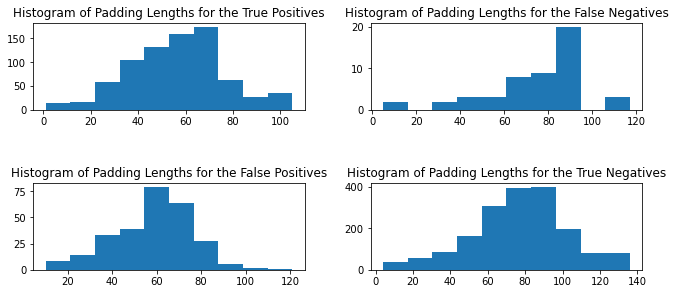

In [195]:
## Histograms 
fig = plt.figure()

fig.set_size_inches(10, 5)

# Adds subplot on position 1
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax.hist(paddingLengths_tp)
ax.set_title("Histogram of Padding Lengths for the True Positives")
ax2.hist(paddingLengths_fn)
ax2.set_title("Histogram of Padding Lengths for the False Negatives")
ax3.hist(paddingLengths_fp)
ax3.set_title("Histogram of Padding Lengths for the False Positives")
ax4.hist(paddingLengths_tn)
ax4.set_title("Histogram of Padding Lengths for the True Negatives")

fig.tight_layout(pad=4.0)



In [202]:
from scipy import stats
print(f"Stats for Xfn padding lengths: {stats.describe(paddingLengths_fn)}")
print(f"Stats for the padding lengths of X (the entire dataset) = {stats.describe(paddingLengths)}")

Stats for Xfn padding lengths: DescribeResult(nobs=50, minmax=(5, 117), mean=74.56, variance=497.63918367346946, skewness=-1.042589714349226, kurtosis=1.8810561145972553)
Stats for the padding lengths of X (the entire dataset) = DescribeResult(nobs=14552, minmax=(1, 136), mean=69.40454920285872, variance=625.0863458760751, skewness=-0.020572933031836993, kurtosis=-0.1796103044878361)


In [198]:
print(f'The median of Xfn padding lengths = {np.median(paddingLengths_fn)}')
print(f'The median of Xtp padding lengths = {np.median(paddingLengths_tp)}')
print(f'The median of Xfp padding lengths = {np.median(paddingLengths_fp)}')
print(f'The median of Xtn padding lengths = {np.median(paddingLengths_tn)}')

The median of Xfn padding lengths = 80.0
The median of Xtp padding lengths = 56.5
The median of Xfp padding lengths = 61.0
The median of Xtn padding lengths = 79.0


In [199]:
print(f'The median padding length for the entire dataset X  = {np.median(paddingLengths)}')

The median padding length for the entire dataset X  = 70.0


#### Question
Could the false negative errors be due to padding?

### Trying shorter time series to reduce the padding percentage


In [203]:
newLength = 80 #the reduced length of the time series
X80 = X[:, :newLength]



In [204]:
#Splitting the data into train and test sets

Xtrain, Xtest, ytrain, ytest =train_test_split(X80, Y, test_size=0.2, random_state=42)

In [205]:
# Setting up the search grid:
param_grid = {'svc__kernel' : ['linear', 'rbf'], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

#Standardizing and building the model with grid search

mode80 = svmStandardized_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid)


dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma=0.005))])
{'svc__gamma': 0.005, 'svc__kernel': 'rbf'}
{'cv': None, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('standardscaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))], 'estimator__verbose': False, 'estimator__standardscaler': StandardScaler(), 'estimator__svc': SVC(class_weight='balanced'), 'estimator__standardscaler__copy': True, 'estimator__standardscaler__with_mean': True, 'estimator__standardscaler__with_std': True, 'estima

In [ ]:
[[ 784   50]
 [ 273 1804]]

In [206]:
newLength = 110 #the reduced length of the time series
X110 = X[:, :newLength]
#Splitting the data into train and test sets
Xtrain, Xtest, ytrain, ytest =train_test_split(X110, Y, test_size=0.2, random_state=42)
# Setting up the search grid:
param_grid = {'svc__kernel' : [ 'rbf'], 'svc__gamma': [0.005]}

#Standardizing and building the model with grid search

model110 = svmStandardized_withGridSearch(Xtrain, Xtest, ytrain, ytest, param_grid)

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma=0.005))])
{'svc__gamma': 0.005, 'svc__kernel': 'rbf'}
{'cv': None, 'error_score': nan, 'estimator__memory': None, 'estimator__steps': [('standardscaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))], 'estimator__verbose': False, 'estimator__standardscaler': StandardScaler(), 'estimator__svc': SVC(class_weight='balanced'), 'estimator__standardscaler__copy': True, 'estimator__standardscaler__with_mean': True, 'estimator__standardscaler__with_std': True, 'estima

#### Conclusions Regarding Reducing the Time Series Lengths

The number of false positives is slightly reduced but the overall quality of the model deteriorates as the time series lengths are reduced.  


# Conclusion Regarding Using SVMs for Classifying ECG Heartbeats

The best SVM model we found was created by:
1. Standardizing the dataset first
2. Parameter settings are kernel='rbf', gamma = 0.005, class_weight = 'balanced'


The results are:

1. Accuracy = 0.8890415664720027
2. Precision = 0.9730312837108953
3. Recall = 0.8685604236880116
4. F1-score = 0.917832612566777
5. Confusion Matrix is:

[[ 784   50]

 [ 273 1804]]